#  Algorithm analysis

## Разом із multivariableBigO (29.07.2023)

**Чому обрала використовувати словник:**

З лекції:

Use a dictionary when:

1. The data is unordered, or the order does not matter
2. You will need to update or alter the data during the program
3. The primary purpose of the data structure is looking up values

**Змінні**

кількість котів - n

кількість раундів - m

**While loop**

1. while loop: O(log2(n))  binary search, Log Base 2 for n

    Кількість раундів зменшується на 3 при кожному циклі. Якщо узяти приклад із 10 раундами, то цикл повторюється рівних 3 рази і ще третину, отже складність усього циклу буде log2(n), бо log2(10)=3,32 ?

    Complexity = O(log2(n))

**Раунди**


**Раунд 1** 

```python
if rounds:
    for cat in cats:
        cat["hat_on"] = False if cat["hat_on"] else True
        rounds -= 1
    else:
        break
```
- `if rounds:` - O(1)
- `for cat in cats:` ітеруємося по усім котам - O(m)
- Сама перевірка статусу ["hat_on"] - O(1)

Complexity = O(m), бо ми перевіряємо кожний елемент у списку і міняємо статус на інший bool.

**Раунд 2** 

```python
for cat in cats:
    if cat["cat_index"] % 2 == 0:
        cat["hat_on"] = False if cat["hat_on"] else True
```

- `for cat in cats`: ітеруємося по усім котам - 
    - *O(m)*
- `if cat["cat_index"] % 2 == 0:` - перевірка одного кота - O(1): 
    - *O(m) x O(1)*
- Сама перевірка статусу ["hat_on"] - O(1): 
    - *O(m) x (O(1) + O(1))*
    - дужки і плюс, бо преревірка не є циклом, тому вважаю що вони просто йдуть по черзі

Complexity = O(m) . Бо не дивлячись на те, що ми даємо/забираємо шапки тільки половині котів, все одно ітеруємось по усім.

**Раунд 3** 

```python
for cat in cats:
    if cat["cat_index"] % 3 == 0:
        cat["hat_on"] = False if cat["hat_on"] else True
```

Complexity = O(m). Думаю, що тут теж саме, що і у раунді 2

**List**


Оцінка list.append():

> most of the times, .append() will just take O(1) time, i.e. those O(n) operations are amortized in the more common O(1) ones.
> 
> Using the aggregate method, we can determine that the amortized time complexity of a list’s .append() operation is O(1). An intuition of this may be the following: in order to hit the worst-case scenario, i.e. O(n), we need to perform n operations (where n, in this case, is a power of 2): until then, each operation takes O(1) time. This means that those n operations take roughly O(2n) time, which is O(n). Finally, we can determine that the amortized cost per operation is O(n) / n = O(1).

Source: https://levelup.gitconnected.com/on-pythons-append-time-complexity-19dfbff1c87



```python
res: list = []
    for cat in cats:
        if cat["hat_on"]:
            res.append(cat["cat_index"])

    print(f"Number of cats with hats on: {res}")
```

- `for cat in cats:` - `for cat in cats`: ітеруємося по усім котам - 
    - *O(m)*
- `if cat["hat_on"]:`
    - *O(1)*
- `res.append(cat["cat_index"])`
    - *O(1)* якщо m не є ступенем 2. Якщо так, то *O(m)*

Complexity = O(m)+2*O(1) = O(m)

Complexity = O(m)+O(1)+O(m) = O(m)

**Overall:**

Complexity = O(log2(n)) * O(m) = O(log(n) * O(m))


Чому log2(n) вважається O(log), так прочитала у книзі 'grokking algorithms An illustrated guide for 
programmers and other curious people - Aditya Y. Bhargava' 
(див. рис.), що воно так позначається, припустила, що воно так і позначається у контексті складності алгоритмів. 

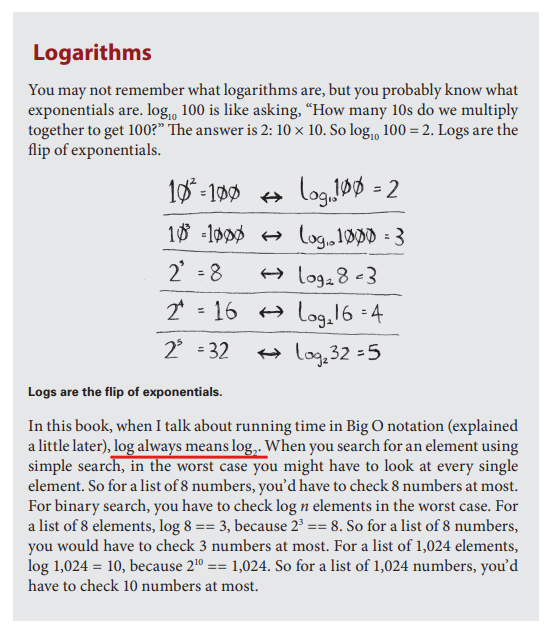

## Минулі

😀Спроба №1 зрозуміти алгоритми:

O-notation analysis:

1. cats list comprehensions: O(n), n = num_of_cats

2. while loop:

    - round 1. iterates over all the cats: O(n), n = num_of_cats

    - round 2. iterates over all the cats: O(n), n = num_of_cats

    - round 3:. iterates over all the cats: O(n), n = num_of_cats

    O(n) + O(n) + O(n) = O(n)

3. res list. iterates over all the cats: O(n), n = num_of_cats

Complexity: O(n)

Нові роздуми щодо складності алгоритмів:

- У while loop:
    Кількість раундів зменшується на 3 при кожному циклі. Якщо узяти приклад із 10 раундами, то цикл повторюється рівних 3 рази і ще третину, отже складність усього циклу буде log2(n), бо log2(10)=3,32 ?

- Щодо інших раундів я не впевнена: 
    `for cat in cats: cat["hat_on"] = (False if cat["hat_on"] else True)`
     
    Мені здається що тут O(n), бо ми перевіряємо кожний елемент у списку і міняємо статус на інший bool.

   - Раунд 2
    - `for cat in cats`: бере кожен елемент у словнику.
    - if cat["cat_index"] % 2 == 0: Перевіряє чи парний номер і тоді бере тільки половину елементів 
    - cat["hat_on"] = (False if cat["hat_on"] else True) Працює тільки з половиною елементів у словнику

    Тоді можна сказати що це більше O(n/2) чи все ж таки O(n)?

    У наступному лупі ми вже працюємо тільки із елементами, що діляться на 3.